**YOUR NAME**

Fall 2024

CS 251: Data Analysis and Visualization

# Lab 4c | PCA and Image Compression

In the project, you will be taking advantage of the similarity across a set of similar images to compress the entire set. In the lab, you will be taking advantage of the similarty of across rows in a single image to compress the single image.

In [51]:
import numpy as np
import matplotlib.pyplot as plt


plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-dark'])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': [7,7]})

np.set_printoptions(suppress=True, precision=5)

## Task 1: Preparing the Grayscale Image

### 1a. Import and view an image

1. Import `lorikeet_grayscale.npy` using numpy's [load] (https://numpy.org/doc/stable/reference/generated/numpy.load.html)
2. Print the shape of the numpy array. It should be 2D with 678 rows and 907 columns. We will treat it as a grayscale image.
3. Display the image using pyplot's [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).
4. Show the pyplot


(678, 907)


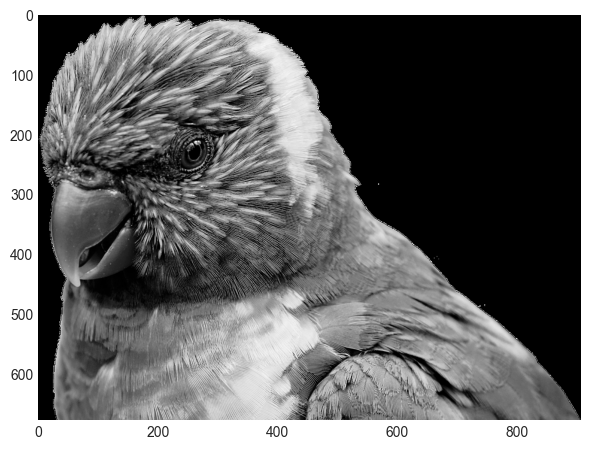

In [52]:
img = np.load("img/lorikeet_grayscale.npy")
print(img.shape)
plt.imshow(img);

### 1b. Compute and display mean image row

1. In PCA, we use the principal components to reconstruct data by adding/substracting values from the mean. So let's look at the mean across all the features. That means we calculate the mean row of the image. Store it in a variable named `img_orig_means`. It should have the shape `(907,)`.
2. Plot the mean row (reshaped to `(1, 907)` using `imshow`. Since that image will be 1 row and 907 columns, it will not be tall enough for us to see the color unless we change the aspect ratio. Set the `aspect` parameter to `100`.

(907,)


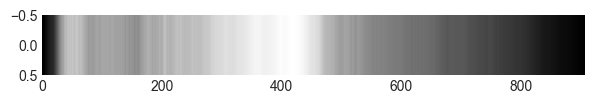

In [53]:
# Your code here
img_orig_means = img.mean(axis=0)
print(img_orig_means.shape)

plt.imshow(img_orig_means.reshape(1, 907), aspect=100)

*Question 1*: Can you relate the mean row to the entire image? I.e. does this make sense? 

*Answer 1*:  
Yes, the plotted mean row above makes sense as for the darker left and right regions of the original image, the corresponding color for them in the mean row image is black, and for the lighter mid regions of the original image, the corresponding color for them in the mean row image is white/gray.

## Task 2:  Compress the Image

### Find the Image's Principal Components

Use Sci-kit Learn's [PCA class](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to extract the image's eigenvectors and the principal components
1. Create an instance of the PCA class with 400 components (this means we compute only the first 400 principal components)
2. Call the method `fit_transform` with the image as the X parameter and saving the results into a new variable representing the Transformed values.
3. Print the shape of the Transformed values and the PCA's components.  The Transformed values should have the shape `(678, 400)` and the PCA's components should have the shape `(400, 907)`
4. Create an elbow plot of the [cumulative sum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) of the [PCA's](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) explained variance ratio.
    1. The x axis should be `# of Principal Components`
    2. The y axis should be `Proportional Variance Accounted for`
    3. Include a title, and x and y axis labels

Transformed values: (678, 400)
Components: (400, 907)


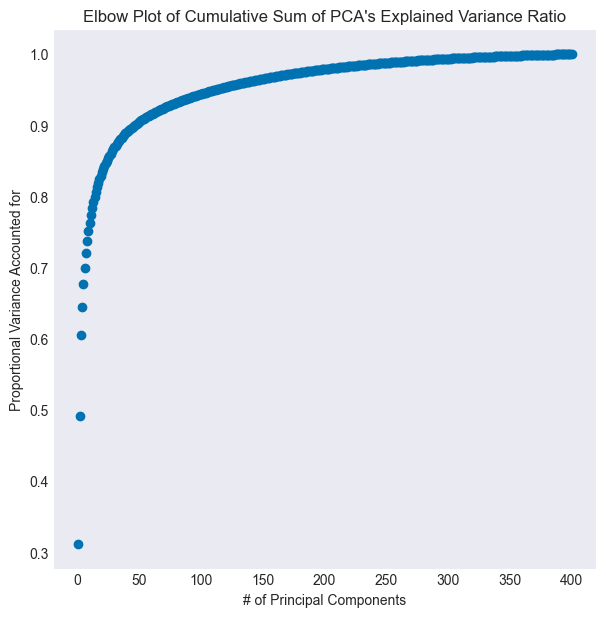

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=400)
img_transformed = pca.fit_transform(img)
e_vecs = pca.components_
e_vals = pca.explained_variance_
print(f"Transformed values: {img_transformed.shape}")
print(f"Components: {e_vecs.shape}")

x = [i + 1 for i in range(e_vecs.shape[0])]
y = [sum(e_vals[:i + 1])/sum(e_vals) for i in range(len(e_vals))]
plt.scatter(x,y)
plt.title("Elbow Plot of Cumulative Sum of PCA's Explained Variance Ratio")
plt.xlabel("# of Principal Components")
plt.ylabel("Proportional Variance Accounted for")
plt.show()

## Task 3: Reconstruct the Image 

### 3a. Reconstruct the image, given the number of principal components

Below we supply the code and the instructions to write a function that reconstructs an image and displays it:
1. Compute the inverse transform:
    1. `transformed_values @ principal_components + orig_var_means`
    2. With shapes `(R, k) @ (k, C) + (C,)`
    3. With `k` equal to the number of principal components you are keeping
2. Show the reconstructed image
    1. Use numpy's [clip](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) method to clip any values less than 0 or greater than 1 in the reconstructed image.
    2. Reshape the reconstructed image back to the shape of the original image
    3. Display the image using pyplot's [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
    4. Show the pyplot
3. Compute the compression ratio of this image
    1. Uncompressed size =  the number of floats in the original image `R*C*n_chans`
    2. Compressed size = the number of floats required to compute the inverse transform `R*k + k*C*n_chans + C*n_chans`
    3. Compression ratio = Compressed size / Uncompressed size

In [55]:
def reconstruct_grayscale(pca, img_orig, img_orig_means, img_transformed, num):
    ''' Reconstruct and display a grayscale image
        pca: the PCA object associated with the flatten image
        img_orig: the original image
        img_orig_means: the mean row of the image
        img_transformed: this was computer earlier using fit_transform
        num: the number of principal components to use in the reconstruction
    '''
    print(f'{img_transformed.shape=}, {pca.components_.shape=}')
    temp = img_transformed[:,:num] @ pca.components_[:num] + img_orig_means
    
    ratio_num = num*img_transformed.shape[0] + num*pca.components_.shape[1] + pca.components_.shape[1]
    ratio_denom = np.prod(img_orig.shape)
    print("Compression Ratio:", ratio_num/ratio_denom)
    
    print("Proportional Variance Accounted for:", np.sum(pca.explained_variance_ratio_[:num]) )
    
    temp = np.reshape(temp, img_orig.shape)
    plt.imshow(np.clip(temp, 0, 1))
    plt.show()

### 3b. Reconstruct with increasing variation explained

1. Reconstruct the image using just 1 principal components
2. Reconstruct the image using 10 principal components
3. Using the elbow plot, determine a number of principal components which account for roughly 90-91% percent of the proportional variance in the image.

img_transformed.shape=(678, 400), pca.components_.shape=(400, 907)
Compression Ratio: 0.004052388339789185
Proportional Variance Accounted for: 0.3102483


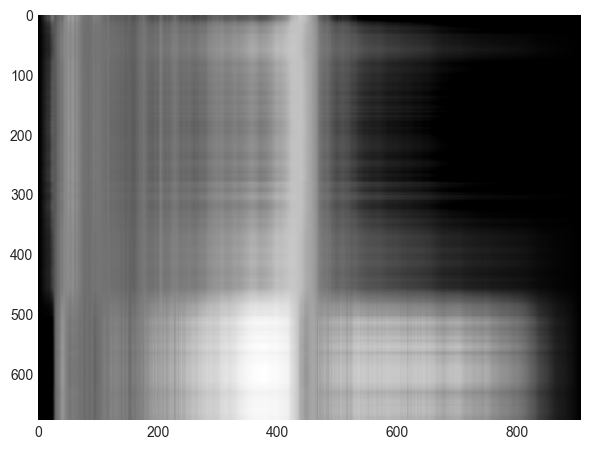

img_transformed.shape=(678, 400), pca.components_.shape=(400, 907)
Compression Ratio: 0.027249547114706008
Proportional Variance Accounted for: 0.75983334


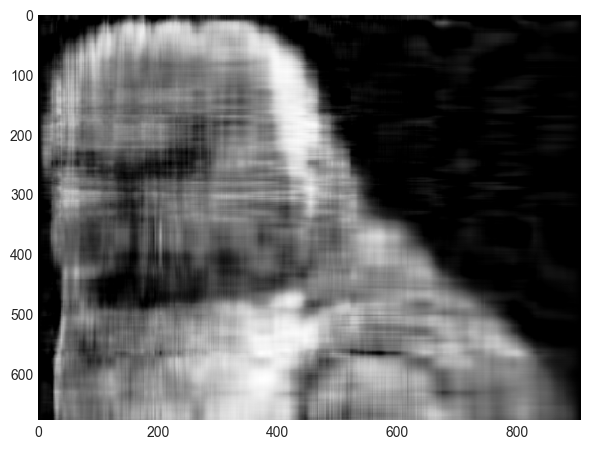

img_transformed.shape=(678, 400), pca.components_.shape=(400, 907)
Compression Ratio: 0.13034803055878078
Proportional Variance Accounted for: 0.9007128


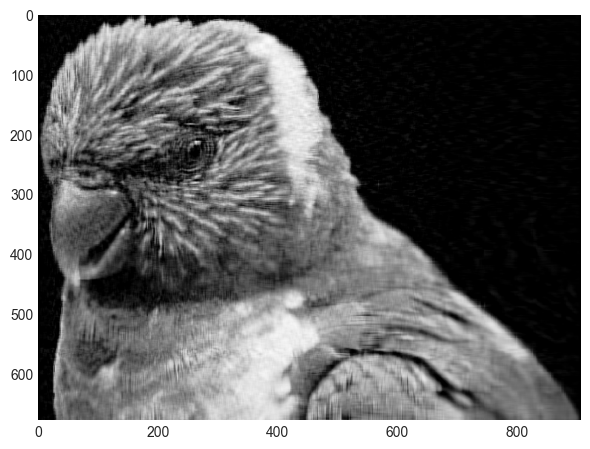

In [56]:
# Your code here. Call reconstruct_grayscale 3 times.
reconstruct_grayscale(pca, img, img_orig_means, img_transformed, 1)
reconstruct_grayscale(pca, img, img_orig_means, img_transformed, 10)
reconstruct_grayscale(pca, img, img_orig_means, img_transformed, 50)


## Task 4: Preparing the Color Image

A color image needs four pieces of information per pixel - the amount of red, blue, and green, as well as the transparency ([alpha channel](https://en.wikipedia.org/wiki/Alpha_channel)). That means a color image has 3 dimensions (rows, columns, 4). We need to flatten the image to 2 dimensions before we can apply PCA to it. Each feature will now be one of the 4 channels of a pixel. 

### 4a. Import and view an image

1. Import `lorikeet.png` using pyplot's [imread](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html)
2. Print the shape of the image. 
3. Display the image using pyplot's [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).(https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html).
4. Show the pyplot


img_color.shape=(678, 907, 4)


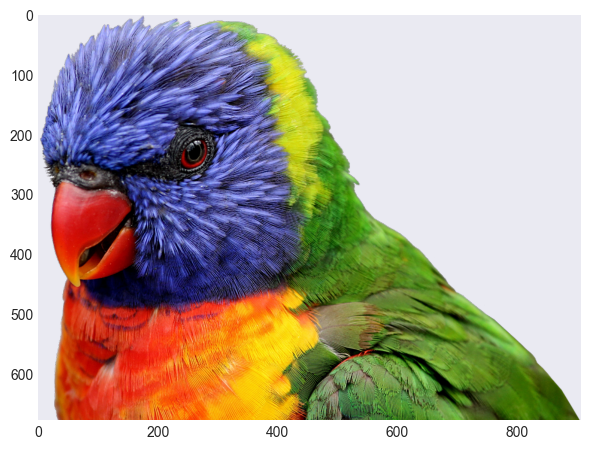

In [57]:
# Your code here
img_color = plt.imread("img/lorikeet.png")
print(f"{img_color.shape=}")

plt.imshow(img_color)
plt.show()

### 4b. Reshape and compute original variable means

1. Reshape your image for compression
    1. Reshape your 3 dimensional `(R, C, n_chans)` array to be a 2 dimensional `(R, C*n_chans)` array and assign it to a new variable (`color_flat`).
    2. Print out the shape of `color_flat`.
2. Calculate the [means](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) of each variable in  `color_flat` (columns) and assign it to a new variable `img_color_means`. Your means should have the shape `(C*n_chans,)`
3. Plot the mean row (reshaped to `(1, 3628)` using `imshow`. Since that image will be 1 row and 3628 columns, it will not be tall enough for us to see the color unless we change the aspect ratio. Set the `aspect` parameter to `400`. *The image will appear in grayscale because it will be interpreted by imshow to be times as wide -- each channel will be treated as a separate pixel. This is good because this helps us to think about what the features are in this case.*
4. Plot it again, but in color. Reshape the image to use the 4 color channels, e.g. it should have 1 row, the original number of columns, and 4 color channels. Then plot the new mean row using `imshow` as above, but with `aspect=100`.

color_flat.shape=(678, 3628)
img_color_means.shape=(3628,)


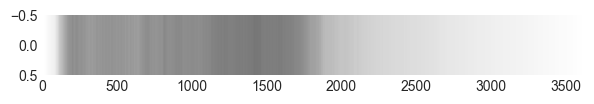

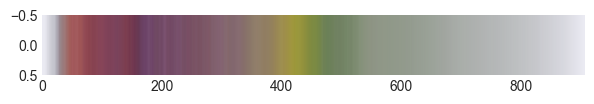

In [61]:
color_flat = img_color.reshape((img_color.shape[0], img_color.shape[1] * img_color.shape[2]))
print(f"{color_flat.shape=}")

img_color_means = color_flat.mean(axis=0)
print(f"{img_color_means.shape=}")

plt.imshow(img_color_means.reshape((1, 3628)), aspect=400)
plt.show()

plt.imshow(img_color_means.reshape((1, img_color.shape[1], 4)), aspect=100)
plt.show()

*Question 2*: Can you relate the mean row to the entire image? I.e. does this make sense? 

*Answer 2*:  
Each vertical bar on the horizontal axis of the mean row plot above seems to denote the most dominant color at that particular point in the original image.

## Task 5:  Compress the Image

### Find the Image's Principal Components

Use Sci-kit Learn's [PCA class](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to extract the image's eigenvectors and the principal components
1. Create an instance of the PCA class with 400 components
2. Call the method `fit_transform` with `color_flat` as the X parameter and saving the results into a new variable representing the Transformed values.
3. Print the shape of the Transformed values and the PCA's components.  The Transformed values should have the shape `(R, 400)` and the PCA's components should have the shape `(400, C*n_chans)`
4. Create an elbow plot of the [cumulative sum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) of the [PCA's](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) explained variance ratio.
    1. The x axis should be `# of Principal Components`
    1. The y axis should be `Proportional Variance Accounted for`
    1. Include a title, and x and y axis labels.

img_color_transformed.shape=(678, 400)
e_vecs.shape=(400, 3628)


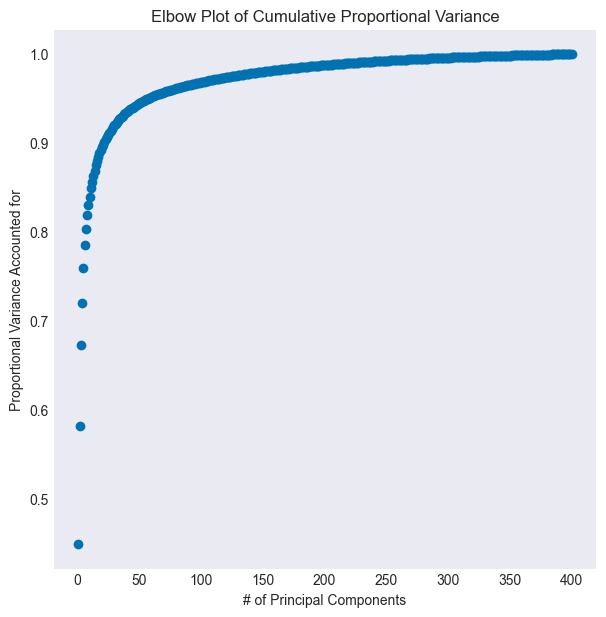

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=400)
img_color_transformed = pca.fit_transform(color_flat)
e_vecs = pca.components_
e_vals = pca.explained_variance_
print(f"{img_color_transformed.shape=}")
print(f"{e_vecs.shape=}")


x = [i + 1 for i in range(len(e_vals))]
y = [sum(e_vals[:i+1])/sum(e_vals) for i in range(len(e_vals))]
plt.scatter(x, y)
plt.xlabel("# of Principal Components")
plt.ylabel("Proportional Variance Accounted for")
plt.title("Elbow Plot of Cumulative Proportional Variance")
plt.show()


## Task 6: Reconstruct the Image 

### 3a. Reconstruct the image, given the number of principal components

Write a function `reconstruct_color` that follows the steps below. It is almost the same as `reconstruct_grayscale`, but requires more reshaping.

1. Compute the inverse transform:
    1. `transformed_values @ principal_components + orig_var_means`
    2. With shapes `(R, k) @ (k, C*n_chans) + (C*n_chans,)`
    3. With `k` equal to the number of principal components you are keeping
2. Show the reconstructed image
    1. Use numpy's [clip](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) method to clip any values less than 0 or greater than 1 in the reconstructed image.
    2. Reshape the reconstructed image back to the shape of the original image
    3. Display the image using pyplot's [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
    4. Show the pyplot
3. Compute the compression ratio of this image
    1. Uncompressed size =  the number of floats in the original image `R*C*n_chans`
    2. Compressed size = the number of floats required to compute the inverse transform `R*k + k*C*n_chans + C*n_chans`
    3. Compression ratio = Compressed size / Uncompressed size

In [84]:
def reconstruct_color(pca, img, img_flat_means, img_transformed, num):
    ''' Reconstruct and display a color image
        pca: the PCA object associated with the flatten image
        img: the original color image (should be 3D)
        img_flat_means: the mean of the flattened (2D) image
        img_transformed: this was computer earlier using fit_transform
        num: the number of principal components to use in the reconstruction
    '''
    inverse_transform = img_transformed[:, :num] @ pca.components_[ :num] + img_flat_means
    inverse_transform = np.clip(inverse_transform, 0, 1)
    inverse_transform = inverse_transform.reshape((678, 907, 4))
    plt.imshow(inverse_transform)
    plt.show()

    uncompressed_size = img.size
    compressed_size = (img.shape[0] * num) + (num * img.shape[1] * img.shape[2]) + (img.shape[1] * img.shape[2])
    compression_ratio = compressed_size / uncompressed_size
    print(f"{compression_ratio=}")
    print("Proportional Variance Accounted for=", np.sum(pca.explained_variance_ratio_[:num]) )

    # Your code here

### 6b. Reconstruct with increasing variation explained

1. Reconstruct the image using just 1 principal components
2. Reconstruct the image using 10 principal components
3. Using the elbow plot, determine a number of principal components which account for roughly 90-91% percent of the proportional variance in the image.

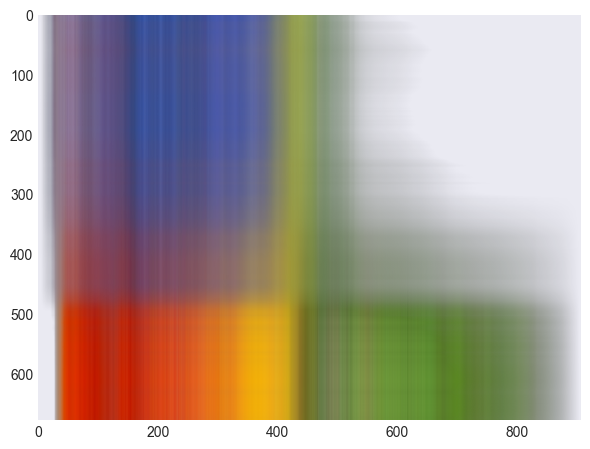

compression_ratio=0.0032254864654782697
Proportional Variance Accounted for= 0.4476505


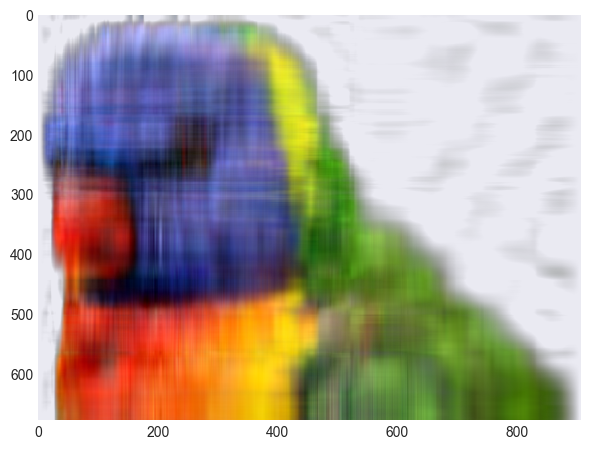

compression_ratio=0.018980528371596854
Proportional Variance Accounted for= 0.8369174


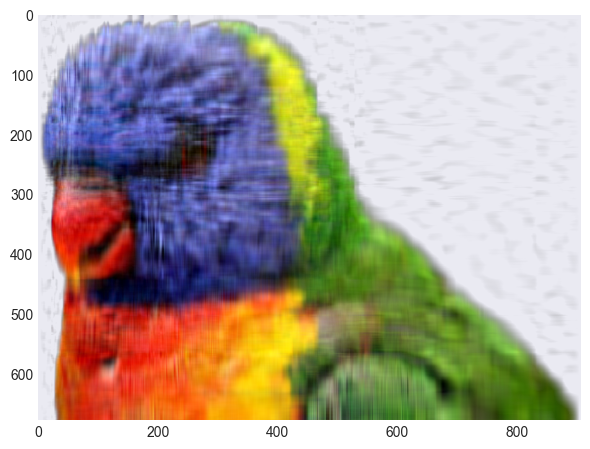

compression_ratio=0.04173781112487926
Proportional Variance Accounted for= 0.9009013


In [93]:
# Your code here
reconstruct_color(pca, img_color, img_color_means, img_color_transformed, 1)
reconstruct_color(pca, img_color, img_color_means, img_color_transformed, 10)
reconstruct_color(pca, img_color, img_color_means, img_color_transformed, 23)

## Turn in your lab

Follow the usual submission format and submit your lab on Google Classroom.